installing required packages

In [1]:
#installing required packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
data= pd.read_csv('/Users/segurithvik/Downloads/cleaned_emotion.csv') #Reading a csv file

In [3]:
data.head() #looking at the first 5 entries in the data set

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,sad
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,sad
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,sad
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,sad
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,sad


In [4]:
data=data.drop(data.columns[[0,1,2]],axis=1) #dropping the first 3 columns

In [5]:
print(data.isnull().sum()) #Checking for null values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [6]:
data.shape #finfing the number of rows and columns in the data set

(909, 21)

In [7]:
data.describe #getting an overview of the dataset

<bound method NDFrame.describe of      meanfreq        sd    median       Q25       Q75       IQR      skew  \
0    0.181338  0.060495  0.187476  0.126197  0.233586  0.107389  0.869088   
1    0.186897  0.062260  0.195070  0.130847  0.243987  0.113140  1.191767   
2    0.189102  0.062901  0.204945  0.131422  0.249978  0.118556  1.312690   
3    0.183036  0.060051  0.174115  0.129949  0.236967  0.107017  1.096409   
4    0.168793  0.057910  0.156266  0.116783  0.216326  0.099543  1.386837   
..        ...       ...       ...       ...       ...       ...       ...   
904  0.244013  0.035477  0.254385  0.229653  0.265573  0.035920  2.214752   
905  0.235383  0.045303  0.248974  0.220745  0.264233  0.043488  2.474743   
906  0.231211  0.044793  0.234847  0.221477  0.262090  0.040613  2.607668   
907  0.213587  0.082267  0.249435  0.207680  0.268538  0.060858  3.460579   
908  0.212537  0.078746  0.245034  0.209794  0.264031  0.054238  2.563983   

          kurt    sp.ent       sfm  ...  

In [8]:
data.label.value_counts() #finding the distribution of target variable

sad      314
angry    302
happy    293
Name: label, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

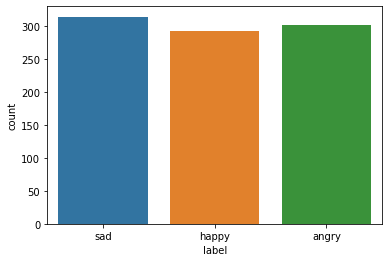

In [9]:
import seaborn as sns
sns.countplot('label', data=data) #countplot for distribution of the target variable

In [10]:
dict = {'label':{'sad':0,'angry':1, 'happy':2}} #encoding sad,angry and happy as 0,1 and 2.      
data.replace(dict,inplace = True)     
type(data)

pandas.core.frame.DataFrame

<AxesSubplot:>

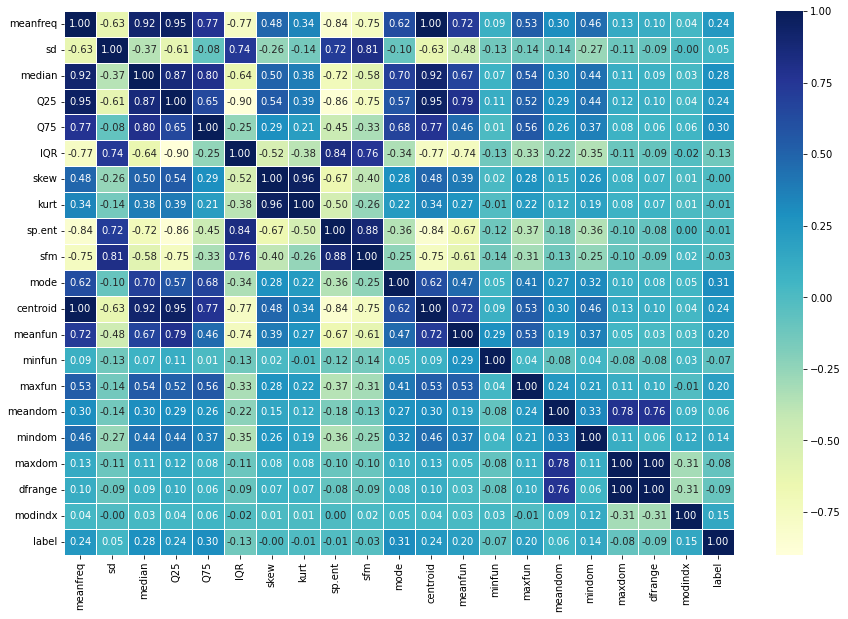

In [11]:
corr_matrix=data.corr() #generating a heatmap for the correlation
plt.figure(figsize=(15,10)) 
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [12]:
x=data.drop(data.columns[-1],axis=1) #dropping the label column in the dataset and created a new data set x
y=data.label #only taking the last label column and created a new dataset y

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35) #splitting the data into test and train data

In [14]:
accuracy = [] #created a list for accuracies

In [15]:
RFC_model = RandomForestClassifier(n_estimators=14, max_features=8, max_depth=16, random_state=0).fit(x_train, y_train) #created a random forest model
train_acc = RFC_model.score(x_train, y_train) #training accuracy
test_acc = RFC_model.score(x_test, y_test) #testing accuracy
m = 'Random Forest Classifier'

#cross validation
scores_rf = cross_val_score(RFC_model,x,y,cv=10,scoring='accuracy') #performing cross validation
accuracy.append([m, train_acc, test_acc, scores_rf.mean()]) #appending the accuracies 

In [16]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(x_train,y_train)
predTree = drugTree.predict(x_test)
test_acc = metrics.accuracy_score(y_test, predTree) # training accuracy
train_acc = drugTree.score(x_train, y_train) #testing accuracy
m = 'Decision tree classifier'

#cross validation
scores_dt = cross_val_score(drugTree,x,y,cv=10,scoring='accuracy') #performing cross validation
accuracy.append([m, train_acc, test_acc, scores_dt.mean()]) #appending the accuracies 

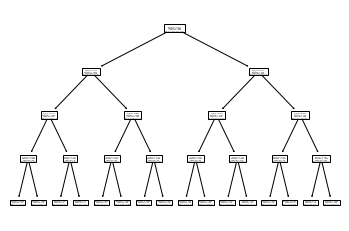

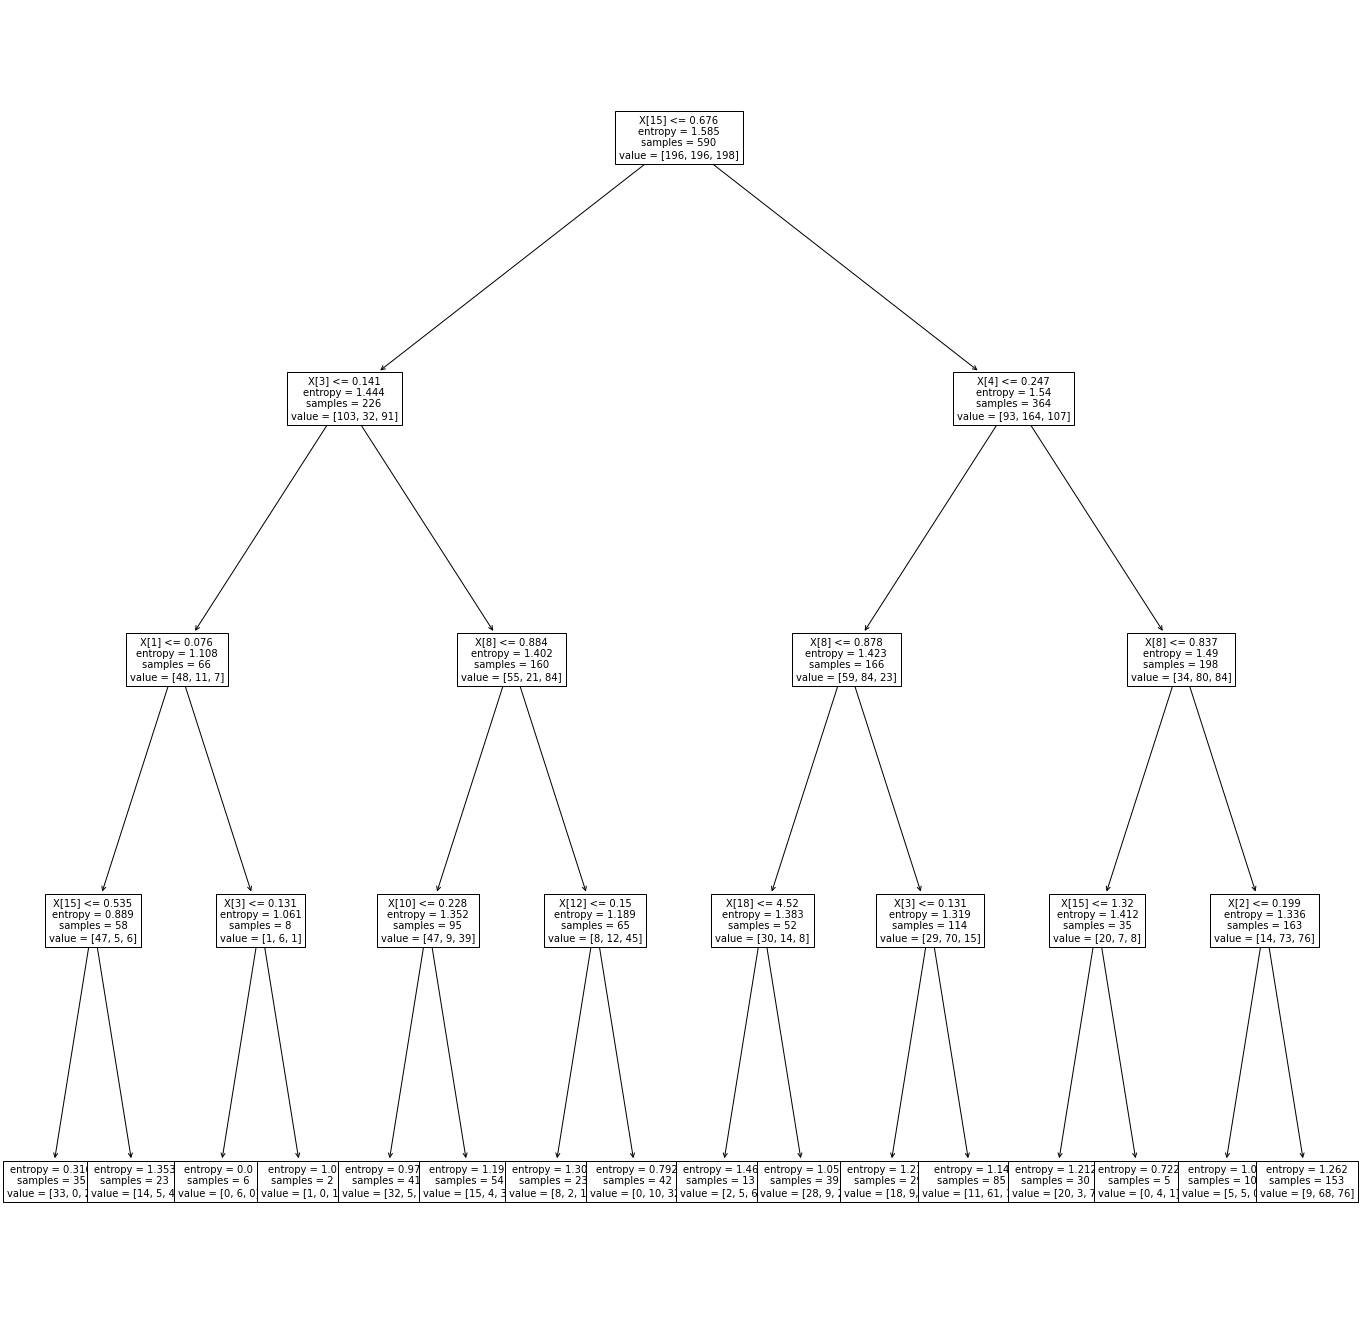

In [17]:
tree.plot_tree(drugTree) #plotting decision tree model
plt.figure(figsize=(24,24))  # set plot size (denoted in inches)
tree.plot_tree(drugTree, fontsize=10)
plt.show()

In [18]:
print("Feature importance: ") #calculating feature importance 
np.array([x.columns.values.tolist(), list(drugTree.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.0'],
       ['sd', '0.04543094755718059'],
       ['median', '0.05133775597396311'],
       ['Q25', '0.18654608511245466'],
       ['Q75', '0.10284235930313697'],
       ['IQR', '0.0'],
       ['skew', '0.0'],
       ['kurt', '0.0'],
       ['sp.ent', '0.2089078781042354'],
       ['sfm', '0.0'],
       ['mode', '0.08241332340182063'],
       ['centroid', '0.0'],
       ['meanfun', '0.049002468788010387'],
       ['minfun', '0.0'],
       ['maxfun', '0.0'],
       ['meandom', '0.23207289540763557'],
       ['mindom', '0.0'],
       ['maxdom', '0.0'],
       ['dfrange', '0.04144628635156285'],
       ['modindx', '0.0']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

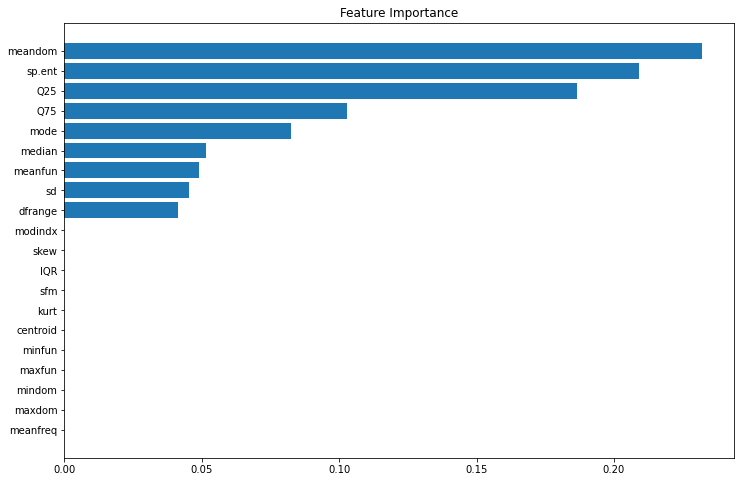

In [19]:
importances = drugTree.feature_importances_ #plotting feature importance in a bar graph
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), data.columns[indices])
plt.title('Feature Importance')

In [20]:
data_q75 = data.groupby('label')['Q75'].mean() #Grouping by label column and Q75 column and calculating the mean of each emotion type for Q75 column
data_q75

label
0    0.237979
1    0.245521
2    0.250664
Name: Q75, dtype: float64

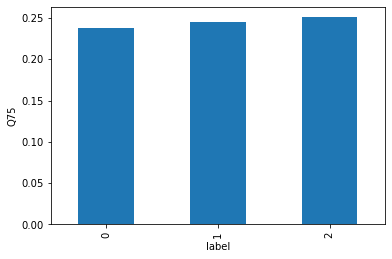

In [21]:
data_q75.plot(kind='bar') #bar plot of the means of different emotion type for Q75 column

plt.ylabel('Q75')
plt.show()

In [22]:
data_meandom = data.groupby('label')['meandom'].mean() #Grouping by label column and Q75 column and calculating the mean of each emotion type for meandom column
data_meandom

label
0    0.692811
1    0.953169
2    0.731017
Name: meandom, dtype: float64

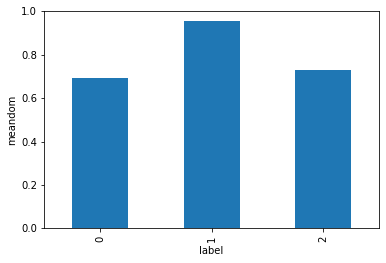

In [23]:
data_meandom.plot(kind='bar') #bar plot of the means of different emotion type for meandom column

plt.ylabel('meandom')
plt.show()

In [24]:
x_dt=x.drop(columns=['meanfreq', 'median', 'skew', 'kurt', 'sfm', 'mode', 'centroid', 'minfun', 'maxfun', 'mindom', 'dfrange']) 
#Dropping the columns which are not significant from the above feature importance result
y_dt=data.label

In [25]:
x_dt_train,x_dt_test,y_dt_train,y_dt_test= train_test_split(x_dt,y_dt,test_size=0.35) #splitting test and train data

In [26]:
model1 = SVC(C=1000,gamma=0.01,kernel='rbf').fit(x_dt_train, y_dt_train) #building svm model
train_acc = model1.score(x_dt_train, y_dt_train) #testing accuracy
test_acc = model1.score(x_dt_test, y_dt_test) #training accuracy
m = 'SVM classifier'

#cross validation
scores_svm=cross_val_score(model1,x_dt,y_dt,cv=10,scoring='accuracy')
accuracy.append([m, train_acc, test_acc, scores_svm.mean()]) #appending the accuracies 

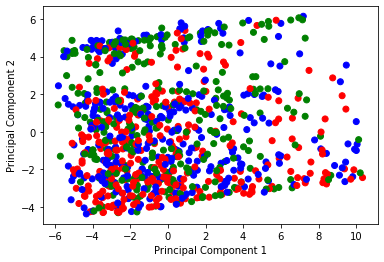

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #performing principal component analysis
X_pca = pca.fit_transform(x)

color_map = {0: 'blue', 2: 'green',1:'red'}

# replace the emotion labels with colors
colors = data['label'].map(color_map)
# plot the data points in a scatter plot with color-coded class labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
knn1=KNeighborsClassifier(n_neighbors=5).fit(x_dt_train,y_dt_train) #building a knn model
train_acc = knn1.score(x_dt_train, y_dt_train) #training accuracy
test_acc = knn1.score(x_dt_test, y_dt_test) #testing accuracy
m = 'KNN classifier'

#cross validation
scores_knn=cross_val_score(knn1,x_dt,y_dt,cv=10,scoring='accuracy')
accuracy.append([m, train_acc, test_acc, scores_knn.mean()]) #appending the accuracies 

In [29]:
result = pd.DataFrame(accuracy, columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy'])
result[['Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy']]

,Model,Training Accuracy,Testing Accuracy,CV Accuracy
0,Random Forest Classifier,0.988136,0.586207,0.599634
1,Decision tree classifier,0.650847,0.510972,0.523663
2,SVM classifier,0.627119,0.548589,0.586374
3,KNN classifier,0.672881,0.470219,0.486374
